#### A 1D simulation designed to measure the long-term behaviour of fitness in range expansions 


In [1]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


Check if a shorter version with the same parameters works:

In [9]:
heh_raw = Array{Float32}(undef,500,201,0)
for i in 1:1
    heh_raw = cat(heh_raw,deserialize("../../study/data/1d/1d_test_$i-meanf.dat");dims=3)
end
toNaN(x) = x < 0 ? NaN : x
#to3d(A) = reshape(A, size(A, 1), size(A, 2), 1)
heh_fitn = toNaN.(heh_raw) #|> to3d

500×201×1 Array{AbstractFloat, 3}:
[:, :, 1] =
   1.0    0.999607    0.999409  …    0.972879    0.970534    0.968639
   1.0    0.99969     0.999439       0.964188    0.963047    0.964092
   1.0    0.999775    0.999278       0.950224    0.947739    0.947655
   1.0    0.999526    0.999421       0.944984    0.943007    0.941051
   1.0    0.999536    0.999051       0.957081    0.956993    0.957848
 NaN    NaN         NaN         …    0.956546    0.956887    0.9543
 NaN    NaN         NaN              0.953716    0.950045    0.953913
 NaN    NaN         NaN              0.957585    0.955222    0.956635
 NaN    NaN         NaN              0.946207    0.94788     0.949195
 NaN    NaN         NaN              0.957248    0.954674    0.953941
   ⋮                            ⋱                            ⋮
 NaN    NaN         NaN            NaN         NaN         NaN
 NaN    NaN         NaN            NaN         NaN         NaN
 NaN    NaN         NaN            NaN         NaN         NaN
 Na

In [10]:
heh_fitn

500×201×1 Array{AbstractFloat, 3}:
[:, :, 1] =
   1.0    0.999607    0.999409  …    0.972879    0.970534    0.968639
   1.0    0.99969     0.999439       0.964188    0.963047    0.964092
   1.0    0.999775    0.999278       0.950224    0.947739    0.947655
   1.0    0.999526    0.999421       0.944984    0.943007    0.941051
   1.0    0.999536    0.999051       0.957081    0.956993    0.957848
 NaN    NaN         NaN         …    0.956546    0.956887    0.9543
 NaN    NaN         NaN              0.953716    0.950045    0.953913
 NaN    NaN         NaN              0.957585    0.955222    0.956635
 NaN    NaN         NaN              0.946207    0.94788     0.949195
 NaN    NaN         NaN              0.957248    0.954674    0.953941
   ⋮                            ⋱                            ⋮
 NaN    NaN         NaN            NaN         NaN         NaN
 NaN    NaN         NaN            NaN         NaN         NaN
 NaN    NaN         NaN            NaN         NaN         NaN
 Na

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_sBazI5mFC5.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_sBazI5mFC5.gif")
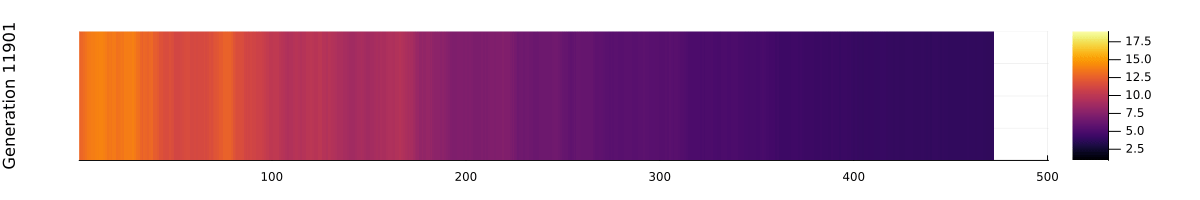

In [26]:
re_heatmap(heh_fitn[:,:,1],11900,12000)

In [39]:
N_GENS = 12000
N_GENS_BURNIN = 10000
X_MAX = 500
heh_fitn_frontav = average_front(heh_fitn,N_GENS,X_MAX;oneside=true)
heh_fitn_frontav_mean = timeseries_mean(heh_fitn_frontav, N_GENS)
heh_fitnN = norm_onset_mean(heh_fitn, N_GENS_BURNIN)
heh_fitnN_frontav = average_front(heh_fitnN, N_GENS, X_MAX; oneside=true)
heh_fitnN_frontav_mean = timeseries_mean(heh_fitnN_frontav, N_GENS)

12000-element Vector{Float32}:
 1.0
 0.99976325
 0.99936044
 0.99860466
 0.9980856
 0.9977799
 0.9973043
 0.99707055
 0.99628484
 0.9961932
 ⋮
 0.521328
 0.52115107
 0.52199054
 0.52104914
 0.5213679
 0.52153873
 0.5200221
 0.520241
 0.5205926

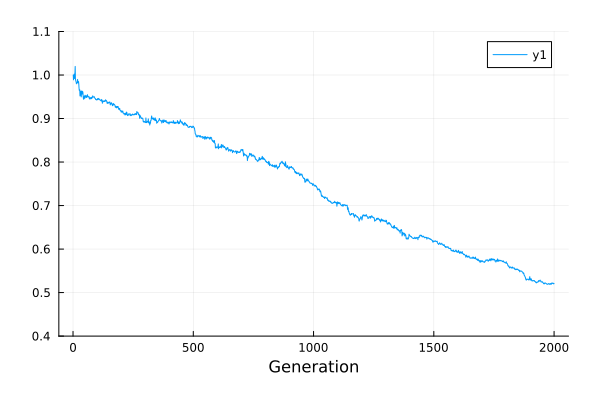

In [41]:
Plots.plot(heh_fitnN_frontav_mean[10001:12000],xlabel="Generation",ylims=(0.4,1.1))

In [15]:
re = rangeexp_1d_inf(1,120,1;x_max_burnin=5,x_max_exp=500,data_to_generate="F",k_capacity=100,r_prolif_rate=2,weightfitn=false,mut_rate=0.05,migr_rate=0.05,s_sel_coef=0.005)

Dict{String, Any} with 5 entries:
  "pops"  => NaN
  "del"   => NaN
  "fitn"  => Float32[1.0 0.999742 … 0.985756 0.985419; 1.0 0.999678 … 0.99237 0…
  "stats" => Dict{String, Any}("wlddim"=>1, "r_prolif_rate"=>2, "max_burnin"=>(…
  "ben"   => NaN